In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("50_Startups.csv")

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dff=df.drop(columns = "State")

In [9]:
df1 = dff.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKTS'},axis=1)

In [10]:
df1.head()

,RDS,Admin,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
df1.describe()

,RDS,Admin,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
df1.corr()

,RDS,Admin,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [13]:
x= df1.drop(columns="Profit")
x.head()

,RDS,Admin,MKTS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [14]:
y=df1["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
md = LinearRegression()

In [19]:
md.fit(x_train,y_train)

LinearRegression()

In [20]:
c= md.intercept_
c

42448.528619571734

In [21]:
m= md.coef_
m

array([0.79045925, 0.03114407, 0.03137206])

In [22]:
yp_train = md.predict(x_train)
yp_train

array([160136.96930361, 150181.63601236,  47165.53108055,  44488.48943544,
       102434.18075449, 145006.02381207,  97913.15425076,  98040.86284406,
       116194.83732626,  68774.55738733, 115640.10975582,  59787.16007991,
       152140.1442941 , 127311.25274765, 102237.77258191, 161184.19036111,
       130654.40218885,  74290.61817989,  47509.05258118, 189615.91220478,
       128447.25198992,  85062.41354634, 110850.82613475, 157447.67674777,
       108684.98330427,  75372.87394935, 118604.71839325, 115540.83448865,
       152892.34013692,  81001.94886382,  56416.42813917, 172286.72314823,
       192214.72908284,  46666.27433881,  65689.34055377])

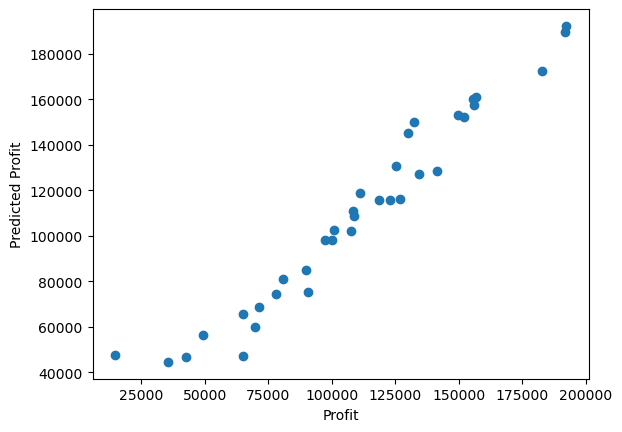

In [31]:
plt.scatter(y_train,yp_train)
plt.xlabel("Profit")
plt.ylabel("Predicted Profit")
plt.show()

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_train,yp_train)

0.9515391457049143

In [26]:
# r2_score is closer to 1 so the train model is accepteble 

In [27]:
yp_test = md.predict(x_test)
yp_test

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

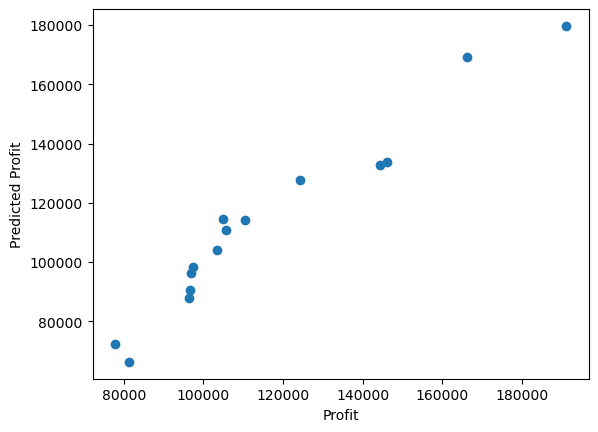

In [32]:
plt.scatter(y_test,yp_test)
plt.xlabel("Profit")
plt.ylabel("Predicted Profit")
plt.show()

In [29]:
r2_score(y_test,yp_test)

0.9355188337118217

In [30]:
# r2_score is closer to 1 so the test model is accepteble 
